In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
restData = pd.read_csv("Cuisine Case Study.csv")


In [3]:
restData.head()

,Res_Id,Rest_Name,Type,Address,City,City_Id,Region,Latitude,Longitude,PinCode,...,Average_Cost_Two,Price_Range,Services,Aggregate_Rating,Rating_Text,Votes,Photo_Count,Outdoor_Dining,Delivery,Takeaway
0,3400299,Farsanwala,['Quick Bites'],"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,NaN,...,700,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0,0,1
1,3400005,Murgi and Franky House,['Quick Bites'],"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001,...,600,2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0,1,1
2,3401013,Halwai ka khajana,['Quick Bites'],"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,282010,...,300,1,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,1,1,1
3,3400290,Halwai ka khajana,['Quick Bites'],"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,282002,...,300,1,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0,1,1
4,3401744,Opal Kitchen Cafe and Bar,['Casual Dining'],"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,NaN,...,1000,3,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,1,0,0


In [4]:
restData.shape

(100000, 23)

In [5]:
restData.describe()

,Res_Id,City_Id,Latitude,Longitude,Average_Cost_Two,Price_Range,Aggregate_Rating,Votes,Photo_Count,Outdoor_Dining,Delivery,Takeaway
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.262795e+07,3926.388600,22.485779,78.255685,644.894480,1.94082,3.505868,467.147510,295.051720,0.004360,0.489580,0.843380
std,8.307685e+06,5377.039373,6.842142,6.835864,632.521161,0.92328,1.201758,1139.874296,844.321147,0.065887,0.499894,0.363444
min,5.000000e+01,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,-18.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500847e+06,10.000000,16.294298,75.837268,250.000000,1.00000,3.400000,24.000000,5.000000,0.000000,0.000000,1.000000
50%,1.867019e+07,25.000000,23.166388,77.641539,450.000000,2.00000,3.900000,135.000000,26.000000,0.000000,0.000000,1.000000
75%,1.880682e+07,11306.000000,27.213219,80.227447,800.000000,3.00000,4.200000,458.000000,196.000000,0.000000,1.000000,1.000000
max,1.915935e+07,11352.000000,75.791315,91.832769,15000.000000,4.00000,4.900000,42539.000000,17702.000000,1.000000,1.000000,1.000000


In [6]:
restData.dtypes

Res_Id                int64
Rest_Name            object
Type                 object
Address              object
City                 object
City_Id               int64
Region               object
Latitude            float64
Longitude           float64
PinCode              object
Region_Verbose       object
Cuisines             object
Timing               object
Average_Cost_Two      int64
Price_Range           int64
Services             object
Aggregate_Rating    float64
Rating_Text          object
Votes                 int64
Photo_Count           int64
Outdoor_Dining        int64
Delivery              int64
Takeaway              int64
dtype: object

In [7]:
import folium 

In [8]:
latitude = restData['Latitude']
longitude = restData['Longitude']


In [9]:
# Calculate the center coordinates
center_lat = latitude.mean()
center_lon = longitude.mean()

# Create a map object
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

In [10]:
for index, row in restData.iterrows():
    # Extract restaurant information
    restaurant_name = row['Rest_Name']
    restaurant_lat = row['Latitude']
    restaurant_lon = row['Longitude']
    
    # Create a marker for each restaurant
    folium.Marker(
        location=[restaurant_lat, restaurant_lon],
        tooltip=restaurant_name,
    ).add_to(m)


### 1. Checking UNIQUE restaurent types


In [11]:
restData['Type'].nunique()

26

In [12]:
restData['Type'].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['CafÃ©']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']"], dtype=object)

In [13]:
restData['Type'].value_counts()

Type
['Quick Bites']        28993
['Casual Dining']      28607
['CafÃ©']              10507
['Bakery']              3741
['Fine Dining']         3455
['Bar']                 3453
['Dessert Parlour']     3281
['Sweet Shop']          3081
['Beverage Shop']       2539
[]                      2460
['Lounge']              1649
['Dhaba']               1477
['Food Court']          1414
['Pub']                  949
['Kiosk']                820
['Bhojanalya']           758
['Microbrewery']         747
['Food Truck']           741
['Mess']                 394
['Paan Shop']            283
['Club']                 265
['Confectionery']        166
['Butcher Shop']         142
['Cocktail Bar']          48
['Shack']                 25
['Pop up']                 5
Name: count, dtype: int64

### Observations:
Most poplar types of restaurents
- ['Quick Bites']        28993
- ['Casual Dining']      28607


### 2. Delivery, Takeaway and Outdoor Dining Service Availability

In [14]:
restData['Delivery'].value_counts()
# 0 - No
# 1 - Yes

Delivery
0    51042
1    48958
Name: count, dtype: int64

In [15]:
restData['Takeaway'].value_counts()
# 0 - No
# 1 - Yes

Takeaway
1    84338
0    15662
Name: count, dtype: int64

In [16]:
restData['Outdoor_Dining'].value_counts()
# 0 - No
# 1 - Yes

Outdoor_Dining
0    99564
1      436
Name: count, dtype: int64

### 3. Top 10 cuisines served


In [17]:

# Split and strip all cuisine values across the entire column
all_cuisines = restData['Cuisines'].str.split(', ').explode().str.strip()

# Create a Series with the cuisine counts
cuisine_counts = all_cuisines.value_counts()

# Print the counts of each cuisine
print(cuisine_counts.head(10))

Cuisines
North Indian    44230
Chinese         28962
Fast Food       23181
Continental     14010
South Indian    12034
Italian         11194
Beverages       10922
Cafe            10701
Desserts         9031
Biryani          8145
Name: count, dtype: int64


### 4. Top 5 services provided

In [18]:

# Split the "Services" column into individual services and create a new DataFrame
services_df = restData['Services'].str.strip('[]').str.replace("'", "").str.split(', ').explode()

# Count the occurrences of each service and store them in a new DataFrame
service_counts = services_df.value_counts().reset_index()

# Rename the columns for clarity
service_counts.columns = ['Service', 'Count']

# Now, you have a DataFrame 'service_counts' containing the counts of each service.
# You can sort it to find the most popular services:
most_popular_services = service_counts.sort_values(by='Count', ascending=False)

# Print the top N most popular services, e.g., top 10:
print(most_popular_services.head(10))

                Service  Count
0                  Cash  95799
1    Takeaway Available  84338
2        Indoor Seating  82493
3                Dinner  80826
4                 Lunch  78284
5           Credit Card  60675
6            Debit Card  57060
7       Air Conditioned  52038
8              Delivery  49150
9  No Alcohol Available  30353


### 6. Most popular locations (Cities)

In [19]:
restData['City'].value_counts()

City
Chennai          11630
Bangalore         4971
Jabalpur          3994
New Delhi         3918
Jaipur            3713
Ajmer             3277
Ahmedabad         3162
Goa               2992
Indore            2958
Coimbatore        2824
Bhopal            2656
Agra              2622
Guwahati          2622
Dehradun          2577
Bhubaneshwar      2555
Jammu             2451
Amritsar          2350
Jamshedpur        2301
Jalandhar         2291
Gwalior           2291
Gorakhpur         2214
Aurangabad        2166
Chandigarh        2138
Allahabad         2115
Haridwar          2070
Dharamshala       1951
Hyderabad         1937
Alappuzha         1934
Cuttack           1924
Guntur            1918
Jamnagar          1897
Amravati          1852
Gangtok           1595
Darjeeling        1469
Gurgaon           1290
Mohali             811
Jhansi             774
Noida              467
Panchkula          425
Zirakpur           257
Secunderabad       183
Gandhinagar        152
Ghaziabad          132
Farida

### 7. Most popular regions (Within cities)

In [37]:
# Step 1: Calculate city popularity
city_popularity = restData['City'].value_counts().reset_index()
city_popularity.columns = ['City', 'Restaurant Count']

# Step 2: Filter for the top 5 cities by popularity
top_5_cities = city_popularity.head(5)['City']

# Step 3: Calculate region popularity within the top 5 cities
region_popularity = restData[restData['City'].isin(top_5_cities)]['Region'].value_counts().reset_index()
region_popularity.columns = ['Region', 'Restaurant Count']

# Step 4: Find the top 5 regions in each of the top 5 cities by popularity
top_5_regions_by_city = {}

for city in top_5_cities:
    city_df = restData[restData['City'] == city]
    top_regions = city_df['Region'].value_counts().head(5).reset_index()
    top_regions.columns = ['Region', 'Restaurant Count']
    top_5_regions_by_city[city] = top_regions

#top_5_regions_for_city = top_5_regions_by_city['Chennai']
# print(top_5_regions_for_city)

top_5_regions_in_most_popular_city = top_5_regions_by_city[top_5_cities.iloc[1]]
print(top_5_regions_in_most_popular_city)



                  Region  Restaurant Count
0            Indiranagar               509
1  Koramangala 5th Block               328
2                    HSR               291
3           Marathahalli               244
4              Jayanagar               189


In [38]:
for i in range (0,5):
    top_5_regions_in_most_popular_city = top_5_regions_by_city[top_5_cities.iloc[i]]
    print(top_5_cities.iloc[i])
    print(top_5_regions_in_most_popular_city)


Chennai
            Region  Restaurant Count
0         T. Nagar              1138
1          Potheri              1041
2     Nungambakkam               815
3      Kodambakkam               650
4  Anna Nagar East               613
Bangalore
                  Region  Restaurant Count
0            Indiranagar               509
1  Koramangala 5th Block               328
2                    HSR               291
3           Marathahalli               244
4              Jayanagar               189
Jabalpur
        Region  Restaurant Count
0  Napier Town              1351
1  Vijay Nagar               477
2  Wright Town               471
3        Cantt               386
4       Rampur               333
New Delhi
            Region  Restaurant Count
0  Connaught Place               395
1   Rajouri Garden               141
2     Punjabi Bagh               109
3           Rohini                81
4      Khan Market                77
Jaipur
           Region  Restaurant Count
0        C Scheme   

In [41]:
top_5_regions_in_most_popular_city = top_5_regions_by_city[top_5_cities.iloc[4]]
print(top_5_cities.iloc[4])
print(top_5_regions_in_most_popular_city)

Jaipur
           Region  Restaurant Count
0        C Scheme               379
1   Malviya Nagar               347
2       Tonk Road               339
3      Mansarovar               262
4  Vaishali Nagar               247


### 8. Average Cost of 2 analysis across restaurents of different price ranges

In [30]:
result = restData.groupby('Price_Range')['Average_Cost_Two'].mean().reset_index()
result.columns = ['Price_Range', 'AvgCostForTwo']

# 'result' now contains the equivalent results as the SQL query.
print(result)

   Price_Range  AvgCostForTwo
0            1     229.051473
1            2     532.517850
2            3    1124.473487
3            4    2223.277494


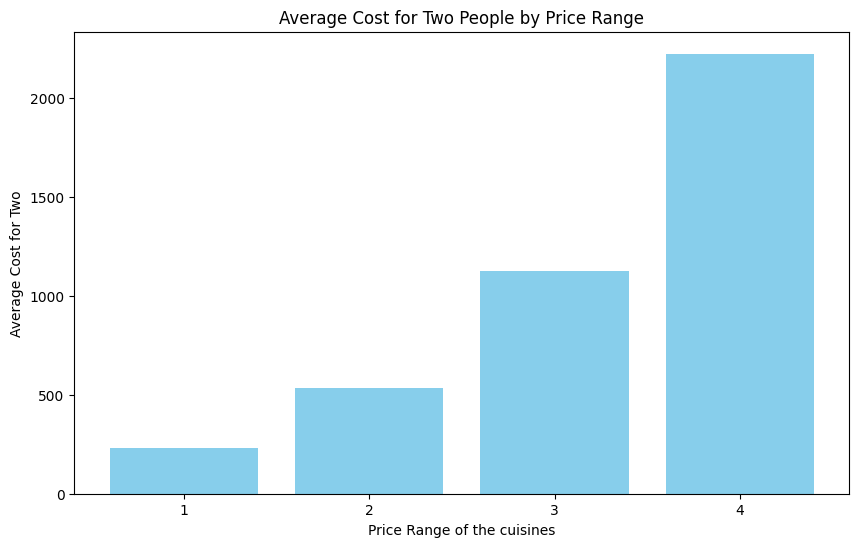

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(result['Price_Range'], result['AvgCostForTwo'], color='skyblue')
plt.xlabel('Price Range of the cuisines')
plt.ylabel('Average Cost for Two')
plt.title('Average Cost for Two People by Price Range')
plt.xticks(result['Price_Range'])
plt.show()

1. Top cities to open
2. Top lcations within cities to open
5. Wheteher to provide takeaway, services and Outside dining services
6. What kind of resaurent to open : 26 types
3. Top cuisines to provide in menu
-  How to price a meal for 2
4. Top services to provide


### UP nExt  cORRELATION aNALYSIS
    

In [25]:
# Example
corr1 = restData['Average_Cost_Two'].corr(restData['Aggregate_Rating'])
print(corr1)

0.24912561240142084


In [24]:
corr2 = restData['Delivery'].corr(restData['Aggregate_Rating'])
corr2

0.22339092462862808

In [26]:
corr2 = restData['Outdoor_Dining'].corr(restData['Aggregate_Rating'])
corr2

0.016411135012067476